# Heirarchial Clustering Dendrogram

### Hierarchical Clustering
Hierarchical Clustering is an unsupervised learning algorithm which is used to group similar data-points in a cluster. It creates clusters that have a pre-determined order from top to bottom. For example, files and folders organized in a hierarchy on a hard-disk.There are two types of Hierarchial Clustering:
#### Agglomerative Hierarchial Clustering:
It is most commonly used. It works in a **bottom-up manner**. Here, we assign each data-point to a individual cluster and then calculate the similarity between each of the clusters using either **Eulidean Distance** or **Manhattan Distance** and club the most similar clusters. It merges similar points of cluster and stops when all the data-points are merged into a single cluster.
#### Divisive Hierarchial Clustering:
It is not used much. It is the inverse of Agglomerative Hierarchial Clustering. It works in a top-down manner. Here, we assign all the data-points to a single cluster after each iteration we remove the data-points from the cluster which are not similar and each data-point that we remove is treated as an individual cluster. Here, we are dividing the cluster in every step. This is why, it is known as Divisive Hierarchial Clustering. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings("ignore")

In [2]:
hr = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\Wholesale customers data.csv")
hr.shape

(440, 8)

In [3]:
hr.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
hr.duplicated().sum()

0

In [9]:
hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [3]:
# standardizing or Normalizing the data to bring our data in all features in same scale
sc = StandardScaler()
hr_scaled = sc.fit_transform(hr)

- standardizing is in between -1 to +1

- Normalizing is in between 0 to 1

In [4]:
hr_scaled.shape

(440, 8)

In [6]:
hr_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [5]:
# converting our scalar data into dataframe
hr_scaled = pd.DataFrame(hr_scaled,columns = hr.columns)
hr_scaled.shape

(440, 8)

In [8]:
hr_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Visualizing the Dendrogram

Text(0, 0.5, 'Distance between samples')

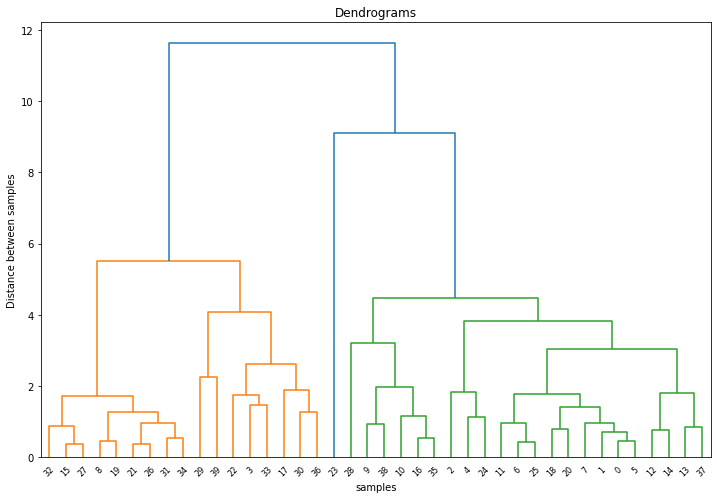

In [9]:
plt.figure(figsize = (12,8))
plt.title('Dendrograms')
dendrogram = shc.dendrogram(shc.linkage(hr_scaled.iloc[:40,:],method = 'ward'))
plt.xlabel('samples')
plt.ylabel('Distance between samples')

Text(0, 0.5, 'Distance between samples')

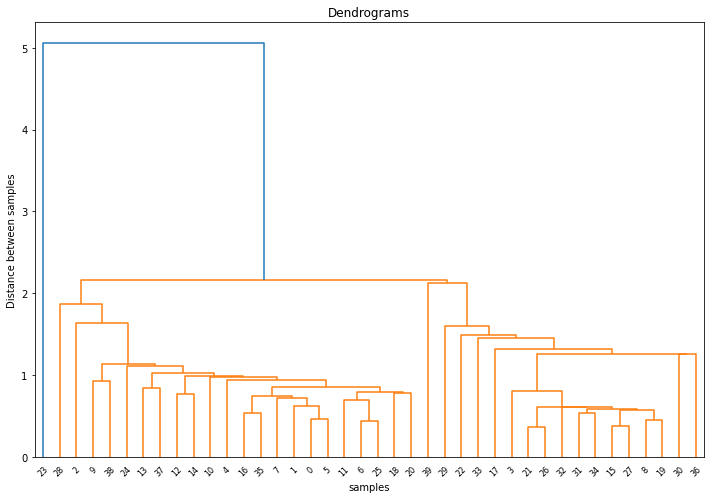

In [15]:
plt.figure(figsize = (12,8))
plt.title('Dendrograms')
dendrogram = shc.dendrogram(shc.linkage(hr_scaled.iloc[:40,:],method = 'single',metric = 'euclidean',optimal_ordering = False))
plt.xlabel('samples')
plt.ylabel('Distance between samples')

Text(0, 0.5, 'Distance between samples')

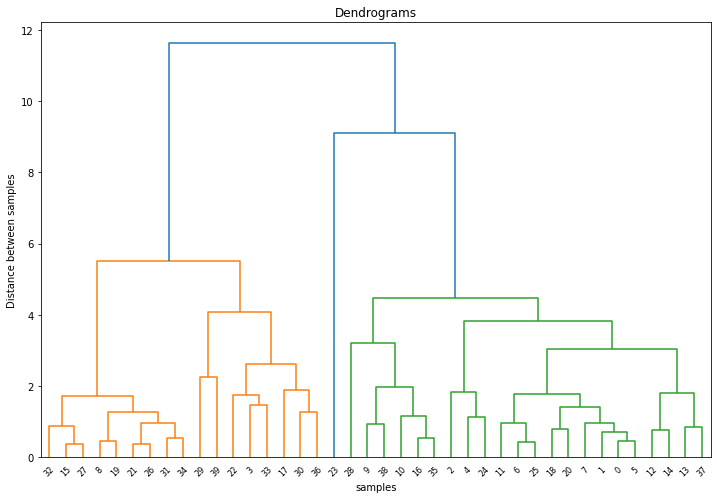

In [12]:
plt.figure(figsize = (12,8))
plt.title('Dendrograms')
dendrogram = shc.dendrogram(shc.linkage(hr_scaled.iloc[:40,:],method = 'ward',optimal_ordering = False))
plt.xlabel('samples')
plt.ylabel('Distance between samples')

### observation: 
    - here we can see first 0 and 5 points ar connected and so next from there it connects all k nearest points like 15,27 and 8,19 and 21,26 so on from there it heights grows like 6,7 and 32,26 so on
    - It creates clusters as many we want we will custers k = 2 or k = 4 or k = 10 so on
    - The height of the dendogram represents the Euclidean distance between points. It can be seen that Euclidean Distance between points 6&7 is greater than the distance between points 0 and 5.  
    
    - Now, we are going to join the cluster formed by joining two points to the next nearest cluster or point which results into another cluster. From above, we can see that point 1 is closest to cluster of point 0 and 5. A dendrogram can be generated by joining point 1 with dendrogram of point 0 and 5. We continue this process until all the points are joined together to form one big cluster.

## How to decide the number of clusters? 

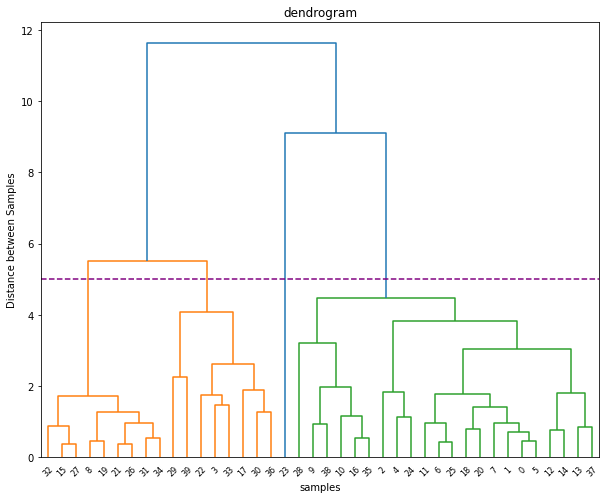

In [15]:
plt.figure(figsize = (10,8))
dendrogram = shc.dendrogram(shc.linkage(hr_scaled.iloc[:40,:],method = 'ward'))
#ward is used to calculate distance between newly formed clusters and can only be used with Euclidean Distance
plt.axhline(y = 5,color = 'purple',linestyle = "--")
plt.xlabel('samples')
plt.ylabel('Distance between Samples')
plt.title('dendrogram')
plt.show()

**From above, you can see that the line cuts the dendrogram at two points. That means we are going to apply hierarchial clustering for two clusters**